https://pymoo.org/customization/permutation.html

In [72]:
import numpy as np
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize
from pymoo.problems.single.traveling_salesman import create_random_tsp_problem
from pymoo.operators.sampling.rnd import PermutationRandomSampling
from pymoo.operators.crossover.ox import OrderCrossover
from pymoo.operators.mutation.inversion import InversionMutation
from pymoo.termination.default import DefaultSingleObjectiveTermination
from pymoo.problems.single.flowshop_scheduling import create_random_flowshop_problem


problem = create_random_flowshop_problem(n_machines=10, n_jobs=10, seed=1)

algorithm = GA(
    pop_size=20,
    eliminate_duplicates=True,
    sampling=PermutationRandomSampling(),
    mutation=InversionMutation(),
    crossover=OrderCrossover()
)

termination = DefaultSingleObjectiveTermination(period=50, n_max_gen=10000)


res = minimize(
    problem,
    algorithm,
    termination,
    seed=1
)

In [73]:
print("Maximum Span:", np.round(res.F[0], 3))
print("Function Evaluations:", res.algorithm.evaluator.n_eval)

Maximum Span: 1495.135
Function Evaluations: 1020


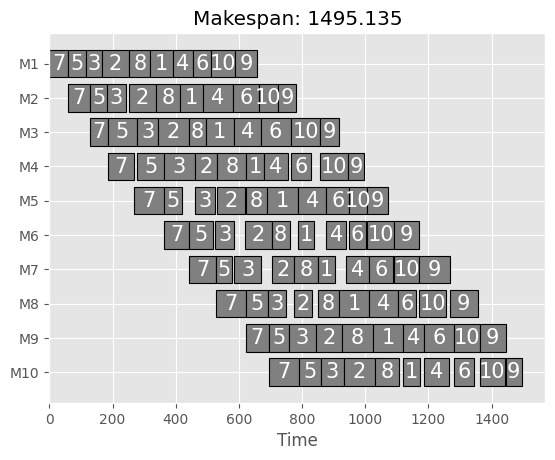

In [74]:
from pymoo.problems.single.flowshop_scheduling import visualize
visualize(problem, res.X)